In [1]:
import pandas as pd

hatyai = "Clean_Data/Clean_data44t_Hatyai.csv"
df = pd.read_csv(hatyai)
df = df.set_index('DATETIMEDATA')

droped_column = ['Unnamed: 0.1','Unnamed: 0']
df = df.drop(columns=droped_column)
df

,PM25,WS,TEMP,RH,WD
DATETIMEDATA,,,,,
2024-01-01 00:00:00,16.5,1,27,79,115
2024-01-01 01:00:00,33.6,1,27,82,97
2024-01-01 02:00:00,34.2,1,26,84,96
2024-01-01 03:00:00,20.1,1,26,82,108
2024-01-01 04:00:00,16.5,1,27,79,106
...,...,...,...,...,...
2024-03-07 19:00:00,16.4,1,30,64,109
2024-03-07 20:00:00,23.3,1,30,67,106
2024-03-07 21:00:00,20.2,1,29,69,104


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1608 entries, 2024-01-01 00:00:00 to 2024-03-07 23:00:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM25    1608 non-null   float64
 1   WS      1608 non-null   int64  
 2   TEMP    1608 non-null   int64  
 3   RH      1608 non-null   int64  
 4   WD      1608 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 75.4+ KB


In [3]:
df.describe()

,PM25,WS,TEMP,RH,WD
count,1608.000000,1608.000000,1608.000000,1608.000000,1608.000000
mean,18.046642,0.899254,27.011816,65.381219,128.976368
std,5.247709,0.463798,7.148647,19.968041,46.639097
min,5.300000,0.000000,0.000000,0.000000,0.000000
25%,14.375000,1.000000,27.000000,57.000000,107.000000
50%,17.650000,1.000000,28.000000,71.000000,121.000000
75%,21.000000,1.000000,30.000000,78.000000,156.000000
max,43.400000,3.000000,36.000000,97.000000,253.000000


In [4]:
%pip install pycaret

Note: you may need to restart the kernel to use updated packages.


In [5]:
from pycaret.regression import *
s = setup(df, target = 'PM25', session_id = 123)

,Description,Value
0,Session id,123
1,Target,PM25
2,Target type,Regression
3,Original data shape,"(1608, 5)"
4,Transformed data shape,"(1608, 5)"
5,Transformed train set shape,"(1125, 5)"
6,Transformed test set shape,"(483, 5)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


In [7]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,3.8606,24.8213,4.9484,0.0874,0.2640,0.2372,0.0210
ada,AdaBoost Regressor,4.0083,25.7238,5.0409,0.0524,0.2719,0.2532,0.0090
omp,Orthogonal Matching Pursuit,4.0234,26.1035,5.0704,0.0462,0.2716,0.2489,0.0040
br,Bayesian Ridge,4.0240,26.1576,5.0744,0.0452,0.2716,0.2488,0.0050
lasso,Lasso Regression,4.0258,26.1627,5.0752,0.0448,0.2717,0.2490,0.0090
llar,Lasso Least Angle Regression,4.0258,26.1627,5.0752,0.0448,0.2717,0.2490,0.0050
en,Elastic Net,4.0272,26.1746,5.0762,0.0444,0.2717,0.2490,0.0050
ridge,Ridge Regression,4.0347,26.1862,5.0777,0.0436,0.2719,0.2495,0.0060
lr,Linear Regression,4.0347,26.1864,5.0778,0.0436,0.2719,0.2495,0.3160
lar,Least Angle Regression,4.0349,26.1914,5.0782,0.0434,0.2719,0.2495,0.0050


In [8]:
print(best)

GradientBoostingRegressor(random_state=123)


In [9]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

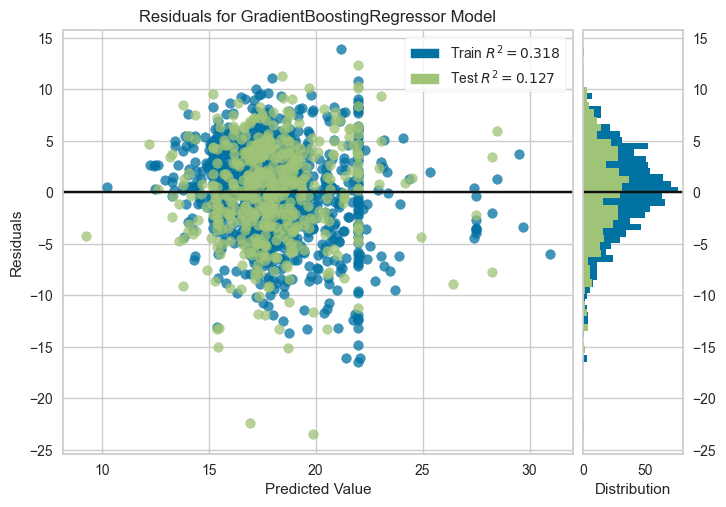

In [10]:

plot_model(best, plot = 'residuals')

In [11]:
mymodel = s.create_model('gbr')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,19:38:25
Status,. . . . . . . . . . . . . . . . . .,Selecting Estimator
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.4515,18.8865,4.3459,0.1510,0.2528,0.2346
1,3.9834,25.6164,5.0613,-0.0616,0.2614,0.2343
2,3.7109,21.5758,4.6450,0.0687,0.2581,0.2352
3,3.6006,20.9880,4.5813,0.0007,0.2539,0.2308
4,4.3372,29.0837,5.3929,0.0807,0.2844,0.2555
5,4.5152,35.2446,5.9367,0.0672,0.2932,0.2575
6,3.5635,20.4065,4.5174,0.2041,0.2544,0.2302
7,3.5644,24.2480,4.9242,0.1945,0.2495,0.2105
8,3.3807,17.7421,4.2121,0.0372,0.2190,0.1915


In [13]:
tuned_model = s.tune_model(mymodel)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.4410,18.8543,4.3422,0.1524,0.2555,0.2395
1,3.8329,23.7048,4.8688,0.0177,0.2534,0.2267
2,3.6490,20.9095,4.5727,0.0975,0.2554,0.2329
3,3.6152,19.5299,4.4193,0.0701,0.2466,0.2287
4,4.2447,28.1893,5.3094,0.1089,0.2786,0.2480
5,4.4716,34.1139,5.8407,0.0972,0.2895,0.2558
6,3.6261,20.6448,4.5437,0.1948,0.2559,0.2340
7,3.6013,25.1535,5.0153,0.1644,0.2534,0.2132
8,3.2740,16.3996,4.0496,0.1100,0.2108,0.1868


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [14]:
holdout_pred = s.predict_model(tuned_model, verbose=True)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,3.7343,23.9328,4.8921,0.1176,0.2636,0.2355


In [15]:
holdout_pred

,WS,TEMP,RH,WD,PM25,prediction_label
DATETIMEDATA,,,,,,
2024-02-28 11:00:00,1,33,50,204,16.100000,16.945046
2024-02-28 15:00:00,1,33,52,198,16.299999,15.905569
2024-02-13 20:00:00,1,28,70,131,19.200001,18.209208
2024-01-17 22:00:00,1,28,70,183,16.600000,17.857882
2024-03-02 18:00:00,1,29,69,155,21.100000,18.219544
...,...,...,...,...,...,...
2024-02-14 06:00:00,1,26,82,132,15.200000,15.814688
2024-02-22 03:00:00,0,26,83,114,13.400000,18.198086
2024-01-04 13:00:00,1,33,48,135,15.400000,17.391243


In [16]:
final_model = s.finalize_model(tuned_model)

In [17]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Assuming your data is stored in a DataFrame called df_train
endog = df['PM25']  # Endogenous variable (target variable)
exog = df[['WS', 'TEMP', 'RH', 'WD']]  # Exogenous variables

# Define and train the SARIMAX model
model = SARIMAX(endog, exog=exog, order=(1, 0, 1), seasonal_order=(1, 1, 1, 24))
result = model.fit()


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.71542D+00    |proj g|=  3.34221D-01


 This problem is unconstrained.



At iterate    5    f=  2.66472D+00    |proj g|=  9.98110D-02

At iterate   10    f=  2.63950D+00    |proj g|=  2.51494D-02

At iterate   15    f=  2.62643D+00    |proj g|=  1.46275D-02

At iterate   20    f=  2.62463D+00    |proj g|=  5.08439D-03

At iterate   25    f=  2.62391D+00    |proj g|=  1.28909D-02

At iterate   30    f=  2.62380D+00    |proj g|=  1.48432D-03

At iterate   35    f=  2.62377D+00    |proj g|=  3.13842D-03

At iterate   40    f=  2.62366D+00    |proj g|=  4.02360D-03

At iterate   45    f=  2.62355D+00    |proj g|=  2.84418D-03

At iterate   50    f=  2.62346D+00    |proj g|=  2.21539D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

In [25]:
# Set the forecast horizon
forecast_horizon = 840  # Forecast horizon of 48 hours

# Assuming you have the 'result' and 'exog' dataframes defined

# Perform the forecast
forecast = result.forecast(steps=forecast_horizon, exog=exog.iloc[-forecast_horizon:])

# Extract the last datetime value from the train.csv DataFrame
last_datetime = df.index[-1]

# Define the date you want to start the forecast from
start_date = '2024-03-09'  # Example: 'YYYY-MM-DD'

# Create a new datetime index for the forecast DataFrame
forecast_index = pd.date_range(start=start_date, periods=forecast_horizon, freq='H')

# Create a DataFrame with forecasted values and the new datetime index
forecast_df = pd.DataFrame({'DATETIMEDATA': forecast_index, 'PREDICTION_PM25': forecast})

# Display the forecast DataFrame
forecast_df


,DATETIMEDATA,PREDICTION_PM25
2024-03-08 00:00:00,2024-03-09 00:00:00,22.877007
2024-03-08 01:00:00,2024-03-09 01:00:00,21.963320
2024-03-08 02:00:00,2024-03-09 02:00:00,20.435963
2024-03-08 03:00:00,2024-03-09 03:00:00,21.697386
2024-03-08 04:00:00,2024-03-09 04:00:00,20.453682
...,...,...
2024-04-11 19:00:00,2024-04-12 19:00:00,19.037328
2024-04-11 20:00:00,2024-04-12 20:00:00,19.524530
2024-04-11 21:00:00,2024-04-12 21:00:00,19.110724
2024-04-11 22:00:00,2024-04-12 22:00:00,19.315620


In [26]:
# แปลงข้อมูลรายชั่วโมงเป็นรายวัน
forecast_df_daily = forecast_df.resample('D', on='DATETIMEDATA').mean()

# แสดง DataFrame ที่แปลงรายชั่วโมงเป็นรายวัน
forecast_df_daily

,PREDICTION_PM25
DATETIMEDATA,
2024-03-09,20.294541
2024-03-10,18.601694
2024-03-11,18.330297
2024-03-12,18.256412
2024-03-13,18.225975
2024-03-14,18.125536
2024-03-15,18.143841
2024-03-16,18.025461
2024-03-17,17.900749


In [23]:
# save to csv
forecast_df.to_csv('predict_hour.csv')

In [27]:
forecast_df_daily.to_csv('predict_day.csv')